In [87]:
import numpy as np
import pandas as pd
import os

In [88]:
import matplotlib.pyplot as plt


In [89]:
os.chdir('C:\\Users\\a\\randomwalk-ds-assessment')

In [90]:
file_path='books.csv'

In [91]:
df = pd.read_csv(file_path)

In [92]:
df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


# Questions

__Q1: How many rows and columns are there in books.csv dataset?__

In [93]:
rows,columns=df.shape
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 399 rows and 24 columns.


__Q2: How many books do not have an original title?__

In [94]:
books_without_original_title = df[df['original_title'].isna() | (df['original_title'] == '')]
print(f"{books_without_original_title.shape[0]} books do not have an original title.")

36 books do not have an original title.


__Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.__

In [95]:
unique_books = df[df['original_title'].notnull()]['book_id'].nunique()
print(f"There are {unique_books} unique books in the dataset after removing null values in the original_title column.")

There are 363 unique books in the dataset after removing null values in the original_title column.


__Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?__

In [96]:
average_rating = df['average_rating'].mean()
print(f"The average rating of all the books in the dataset is {average_rating:.2f}.")

The average rating of all the books in the dataset is 3.98.


__Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.__

In [97]:
books_published_2000 = df[df['original_publication_year'] == 2000].shape[0]
print(f"The number of books published in the year 2000 is {books_published_2000}.")

The number of books published in the year 2000 is 8.


__Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.__

In [98]:
max_ratings_book = df.loc[df['work_ratings_count'].idxmax()]['title']
print(f"The book with the maximum number of ratings is '{max_ratings_book}'.")

The book with the maximum number of ratings is 'The Diary of a Young Girl'.


__Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.__

In [99]:
bins = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
df['rating_bucket'] = pd.cut(df['average_rating'], bins=bins, right=False)
rating_bucket_counts = df.groupby('rating_bucket').size()

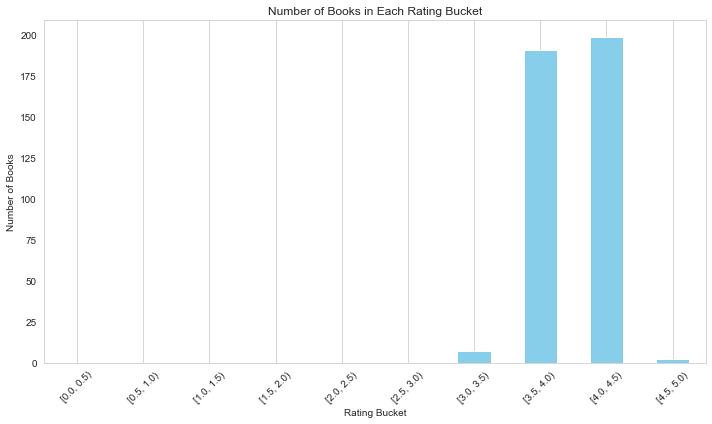

In [100]:
plt.figure(figsize=(10, 6))
rating_bucket_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Rating Bucket')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Rating Bucket')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

__Thank You__